### Introduction

##### YouTube is the most popular and most used video platfrom in the world today. YouTube has a list of trending videos that is updated constantly. Here we will use Python with some packages like Pandas and Matplotlib to analyze a dataset that was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day. It contains data about more than 40,000 trending videos. We will analyze this data to get insights into YouTube trending videos, to see what is common between these videos. Those insights might also be used by people who want to increase popularity of their videos on YouTube.

##### The dataset that we will use is obtained from Kaggle here  https://www.kaggle.com/datasnaek/youtube-new . It contains data about trending videos for many countries. Here we will analyze USA trending videos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from scipy.stats import norm

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Hiding warnings for cleaner display
import warnings
warnings.filterwarnings('ignore')

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5

In [2]:
df_yt = pd.read_csv("USvideos.csv")
df_yt.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [3]:
print(df_yt.shape)
print(df_yt.info())

(40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bo

In [4]:
df_yt.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [5]:
df_yt.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


<AxesSubplot:>

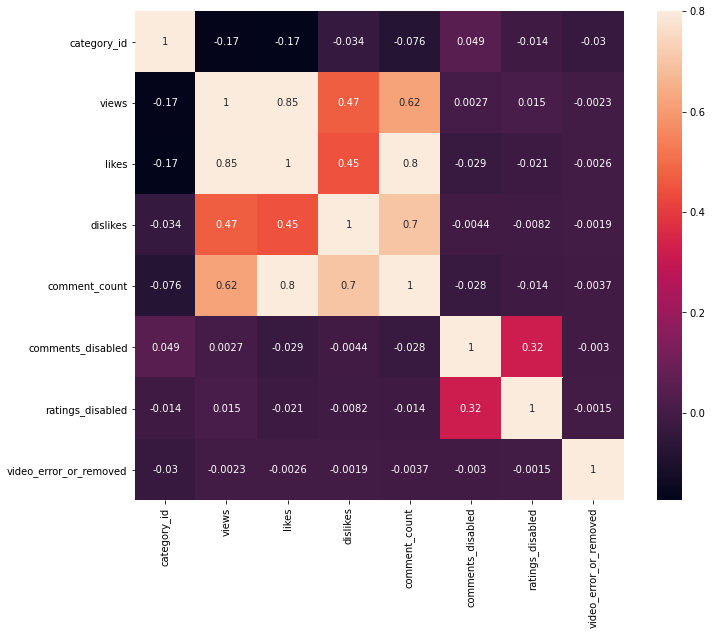

In [6]:
#correlation matrix
cormat = df_yt.corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(cormat, vmax=.8, square=True, annot= True)

### Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition

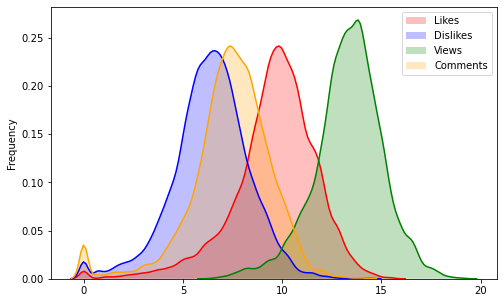

In [7]:
df_yt['likes_log'] = np.log(df_yt['likes']+1)
df_yt['views_log'] = np.log(df_yt['views']+1)
df_yt['dislikes_log'] = np.log(df_yt['dislikes']+1)
df_yt['comment_log'] = np.log(df_yt['comment_count']+1)

g = sns.kdeplot(df_yt['likes_log'].values, color="Red", shade = True)
g = sns.kdeplot(df_yt['dislikes_log'].values, color="Blue", shade= True)
g = sns.kdeplot(df_yt['views_log'].values, color="Green", shade= True)
g = sns.kdeplot(df_yt['comment_log'].values, color="Orange", shade= True)
g.set_ylabel("Frequency")
g = g.legend(["Likes","Dislikes",'Views','Comments'])

#### Rate Distribution

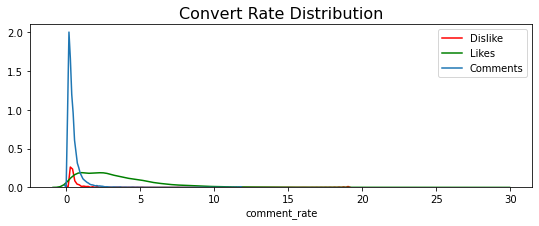

In [8]:
df_yt['like_rate'] = df_yt['likes']/df_yt['views'] * 100
df_yt['dislike_rate'] = df_yt['dislikes']/df_yt['views']* 100
df_yt['comment_rate'] = df_yt['comment_count']/df_yt['views']* 100

plt.figure(figsize = (9,3))

g1 = sns.distplot(df_yt['dislike_rate'], color = 'red' , hist = False, label = "Dislike")
g1 = sns.distplot(df_yt['like_rate'], color = 'green', hist = False, label = "Likes")
g1 = sns.distplot(df_yt['comment_rate'], hist = False, label = "Comments")

g1.set_title('Convert Rate Distribution', fontsize = 16)
plt.legend()
plt.show()



In [9]:
df_yt.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [10]:
df_yt['category_name'] = np.nan

df_yt.loc[(df_yt["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yt.loc[(df_yt["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yt.loc[(df_yt["category_id"] == 10),"category_name"] = 'Music'
df_yt.loc[(df_yt["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yt.loc[(df_yt["category_id"] == 17),"category_name"] = 'Sport'
df_yt.loc[(df_yt["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yt.loc[(df_yt["category_id"] == 20),"category_name"] = 'Gaming'
df_yt.loc[(df_yt["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yt.loc[(df_yt["category_id"] == 23),"category_name"] = 'Comedy'
df_yt.loc[(df_yt["category_id"] == 24),"category_name"] = 'Entertainment'
df_yt.loc[(df_yt["category_id"] == 25),"category_name"] = 'News and Politics'
df_yt.loc[(df_yt["category_id"] == 26),"category_name"] = 'How to and Style'
df_yt.loc[(df_yt["category_id"] == 27),"category_name"] = 'Education'
df_yt.loc[(df_yt["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yt.loc[(df_yt["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yt.loc[(df_yt["category_id"] == 25),"category_name"] = 'News & Politics'

#### Likes less than or equal to 1
#### Dislikes less than or equal to 1

In [44]:
print(len(df_yt[df_yt.likes <=1]))
print(len(df_yt[df_yt.dislikes <=1]))

180
542


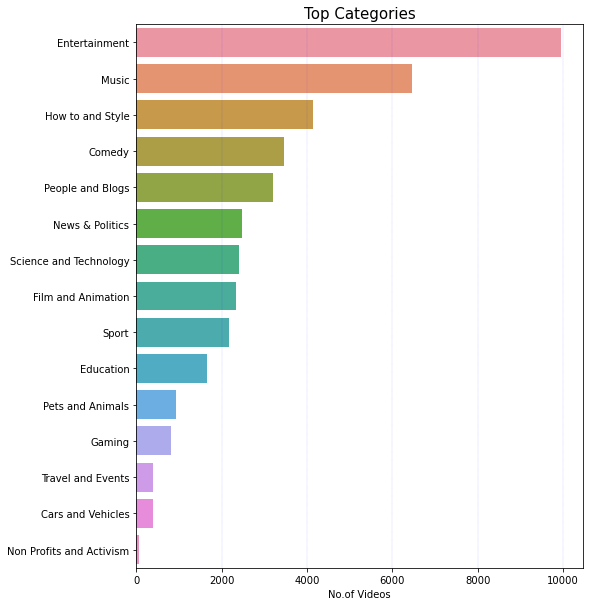

In [12]:
plt.figure(figsize = (8,10))

g=df_yt.groupby('category_name').size().reset_index(name="video_count").nlargest(15,'video_count')
g = sns.barplot('video_count','category_name',data=g)
g.set_title("Top Categories" , fontsize = 15)
g.set_xlabel("No.of Videos", fontsize = 10)
g.set_ylabel('', fontsize = 12)
plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='x')
plt.show()

### Popular and most influential Channels

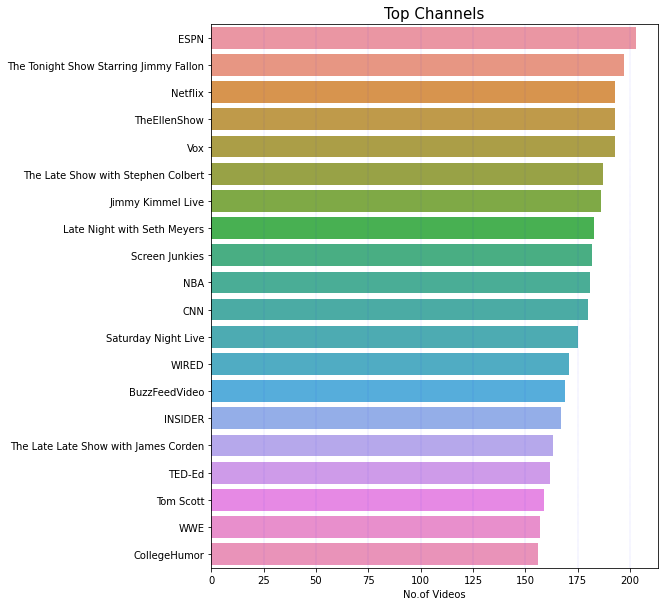

In [13]:
plt.figure(figsize = (8,10))

g=df_yt.groupby('channel_title').size().reset_index(name="video_count").nlargest(20,'video_count')
g = sns.barplot('video_count','channel_title',data=g)
g.set_title("Top Channels" , fontsize = 15)
g.set_xlabel("No.of Videos", fontsize = 10)
g.set_ylabel('', fontsize = 12)
plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='x')
plt.show()

## Date And Time

In [14]:
# Transforming Trending date column to datetime format and splitting into two separate ones.
publish_time = pd.to_datetime(df_yt['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
df_yt['publish_date'] = publish_time.dt.date
df_yt['publish_time'] = publish_time.dt.time
df_yt['publish_hour'] = publish_time.dt.hour
df_yt['publish_month'] = publish_time.dt.month

# Transform trending_date to datetime date format
df_yt['trending_date'] = pd.to_datetime(df_yt['trending_date'], format='%y.%d.%m').dt.date
df_yt.trending_date.value_counts().sort_index(inplace=True)


df_yt.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,views_log,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate,category_name,publish_date,publish_hour,publish_month
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,...,13.525659,7.995307,9.677528,7.686932,0.396326,2.131822,People and Blogs,2017-11-13,17,11


#### Most common words in video titles

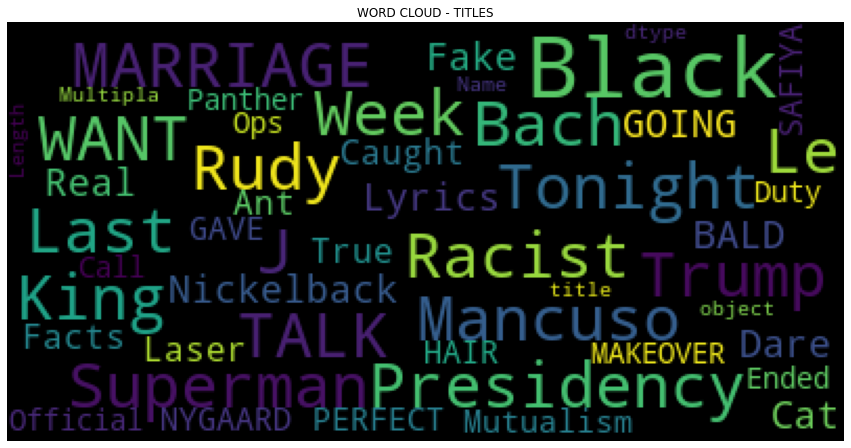

In [40]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_yt['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Quick Stats for Top 10  Videos

In [39]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_date', 'category_name']

most_frequent = df_yt.groupby(selected_columns)['video_id'].agg(
    [('code_count',len)]).sort_values(
    "code_count", ascending=False
).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:100px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0])  + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>{}</table>'.format(table_content))
)

Photo,Channel Name,Title,Category,Publish Date
,Lucas and Marcus,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment,2018-05-13
,grav3yardgirl,Why I'm So Scared (being myself and crying too much),How to and Style,2018-05-14
,Charlie Puth,Charlie Puth - BOY [Official Audio],Music,2018-05-11
,Rooster Teeth,Rooster Teeth Animated Adventures - Millie So Serious,Film and Animation,2018-05-14
,Complex,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Entertainment,2018-05-14
,Unbox Therapy,"The ULTIMATE $30,000 Gaming PC Setup",Science and Technology,2018-05-13
,SamSmithWorldVEVO,Sam Smith - Pray (Official Video) ft. Logic,Music,2018-05-09
,johnmayerVEVO,John Mayer - New Light,Music,2018-05-10
,Kurzgesagt – In a Nutshell,The Deadliest Being on Planet Earth – The Bacteriophage,Education,2018-05-13
,Rita Ora,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Charli XCX (Official Lyric Video)",Entertainment,2018-05-11


#### Let's extract the hour and month value of datetime

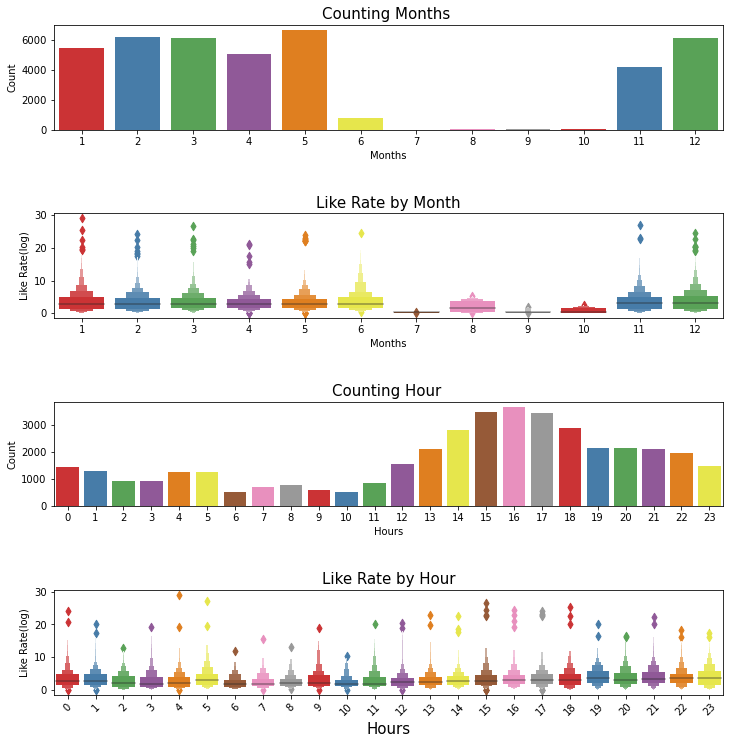

In [16]:
plt.figure(figsize = (12,12))

plt.subplot(411)
g = sns.countplot('publish_month', data=df_yt, palette="Set1")
g.set_title("Counting Months ", fontsize=15)
g.set_xlabel("Months", fontsize=10)
g.set_ylabel("Count", fontsize=10)

plt.subplot(412)
g1 = sns.lvplot(x='publish_month', y='like_rate', data=df_yt, palette="Set1")
g1.set_title("Like Rate by Month", fontsize=15)
g1.set_xlabel("Months", fontsize=10)
g1.set_ylabel("Like Rate(log)", fontsize=10)

plt.subplot(413)
g = sns.countplot('publish_hour', data=df_yt, palette="Set1")
g.set_title("Counting Hour ", fontsize=15)
g.set_xlabel("Hours", fontsize=10)
g.set_ylabel("Count", fontsize=10)

plt.subplot(414)
g1 = sns.lvplot(x='publish_hour', y='like_rate', data=df_yt, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=15)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=10)


plt.subplots_adjust(hspace = 0.8, top = 0.9)

plt.show()

### Spliting Entertainment and Music

In [17]:
df = df_yt.copy()
df_en = df[(df.category_id == 24)]
df_mu = df[(df.category_id == 10)]

In [18]:
def most(my_df, column, num=10): # getting the top 10 videos by default
   
    g=my_df.groupby('title')[column].max().nlargest(num).reset_index()
    
    fig, ax = plt.subplots(figsize=(8,7))
    
    g = sns.barplot(column,'title',data=g)
    g.set_title("Top "+column+" Videos" , fontsize = 15)
    g.set_xlabel("No. of "+column, fontsize = 10)
    g.set_ylabel('', fontsize = 12)
    plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='x')
    plt.show()

## Entertainment

In [19]:
df_en.describe()

,category_id,views,likes,dislikes,comment_count,likes_log,views_log,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate,publish_hour,publish_month
count,9964.0,9.964000e+03,9.964000e+03,9.964000e+03,9.964000e+03,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,24.0,2.067883e+06,5.324333e+04,4.314298e+03,7.383229e+03,9.443809,13.370174,6.391385,7.219234,2.852671,0.158905,0.390046,13.850261,5.335809
std,0.0,5.815996e+06,1.567780e+05,5.232533e+04,4.191398e+04,1.969630,1.621170,1.815167,2.067563,2.354669,0.361981,0.509522,6.161764,3.862231
min,24.0,7.980000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.683361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.0,2.733948e+05,5.126750e+03,2.250000e+02,5.837500e+02,8.542422,12.518676,5.420535,6.371184,1.226398,0.052769,0.132547,11.000000,2.000000
50%,24.0,7.347040e+05,1.623400e+04,6.270000e+02,1.693500e+03,9.694925,13.507224,6.442540,7.435143,2.280318,0.089693,0.249072,15.000000,4.000000
75%,24.0,1.733746e+06,4.154400e+04,1.820250e+03,4.607000e+03,10.634532,14.365796,7.507278,8.435549,3.612164,0.166169,0.482115,18.000000,11.000000
max,24.0,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,14.944828,18.821978,14.330978,14.124157,20.526227,11.982720,9.220823,23.000000,12.000000


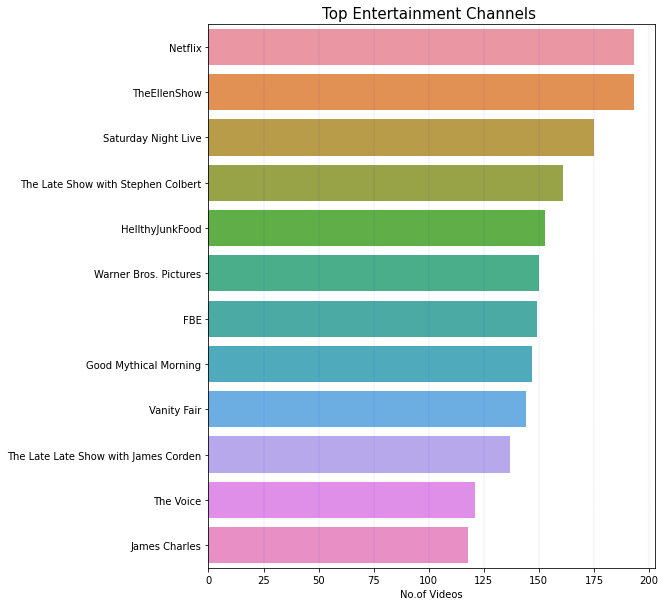

In [20]:
plt.figure(figsize = (8,10))

g=df_en.groupby('channel_title').size().reset_index(name="video_count").nlargest(12,'video_count')
g = sns.barplot('video_count','channel_title',data=g)
g.set_title("Top Entertainment Channels " , fontsize = 15)
g.set_xlabel("No.of Videos", fontsize = 10)
g.set_ylabel('', fontsize = 12)
plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='x')
plt.show()

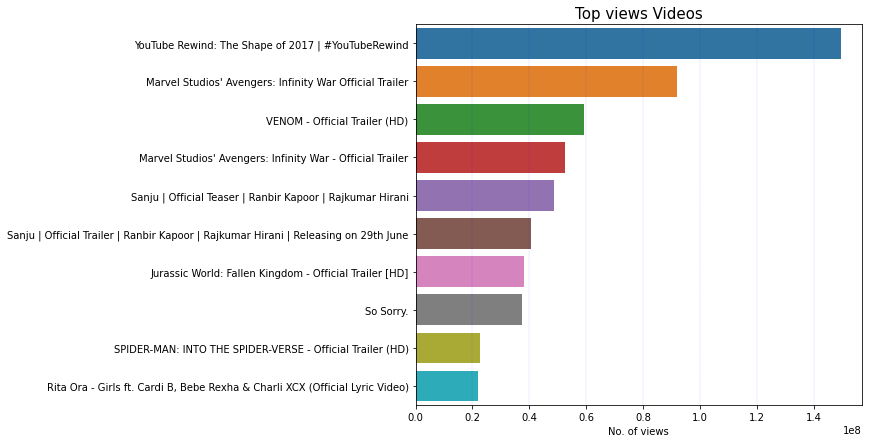

In [21]:
most(df_en, 'views')

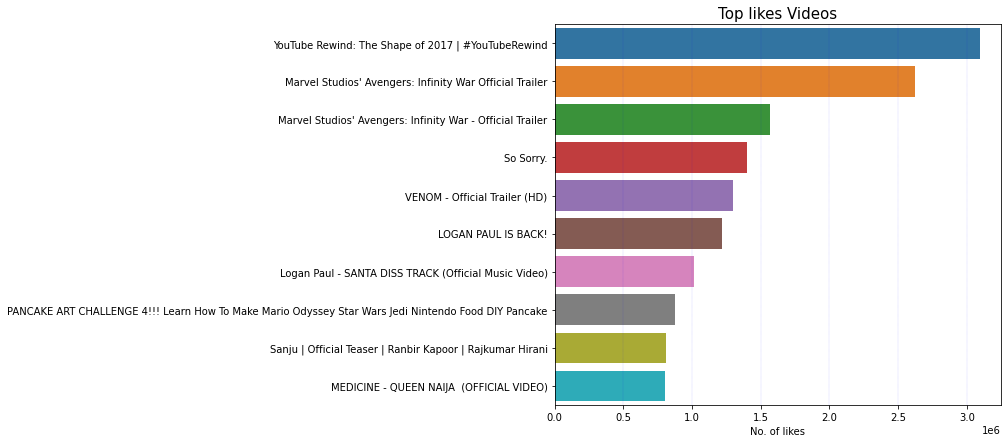

In [22]:
most(df_en, 'likes')


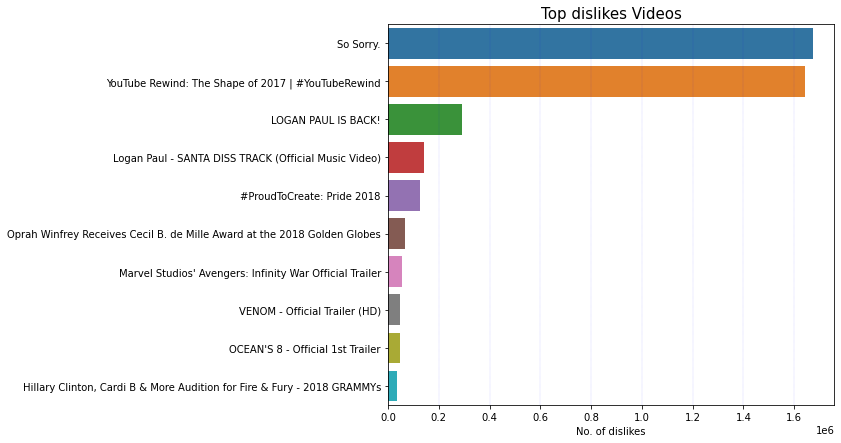

In [23]:
most(df_en, 'dislikes')

#### Most common words in video titles

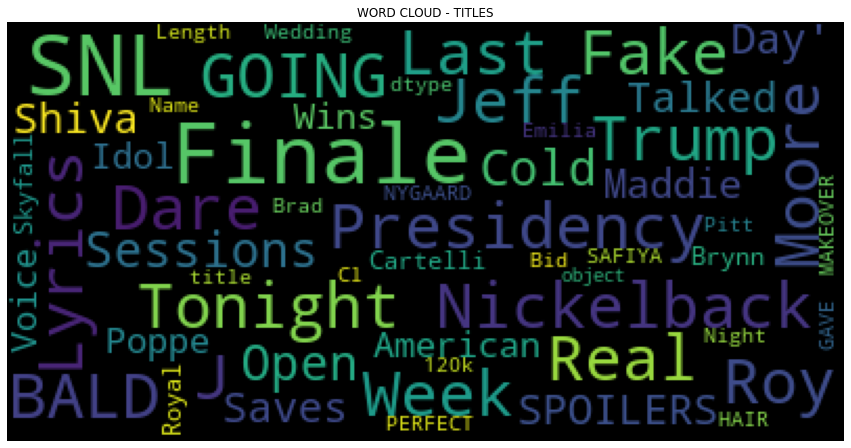

In [24]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_en['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Quick Stats for Top 10 Entertainment Videos

In [25]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_date', 'category_name']

most_frequent = df_en.groupby(selected_columns)['video_id'].agg(
    [('code_count',len)]).sort_values(
    "code_count", ascending=False
).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:60px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0])  + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>{}</table>'.format(table_content))
)

Photo,Channel Name,Title,Category,Publish Date
,Lucas and Marcus,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment,2018-05-13
,Complex,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Entertainment,2018-05-14
,Cobra Kai,Cobra Kai Season 2,Entertainment,2018-05-10
,Rita Ora,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Charli XCX (Official Lyric Video)",Entertainment,2018-05-11
,nigahiga,FORTNITE The Movie (Official Fake Trailer),Entertainment,2018-05-11
,Focus Features,BLACKkKLANSMAN - Official Trailer [HD] - In Theaters August 10,Entertainment,2018-05-14
,Vat19,"We built the Infinity Gauntlet with 25,000 magnets!",Entertainment,2018-05-12
,Brad Mondo,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER BASED ON HER FEATURES: BTS! |bradmondo,Entertainment,2018-05-18
,Saturday Night Live,Royal Wedding - SNL,Entertainment,2018-05-20
,Teen Vogue,Riverdale Cast Competes in a Compliment Battle | Teen Vogue,Entertainment,2018-05-15


#### Let's extract the hour and month value of datetime

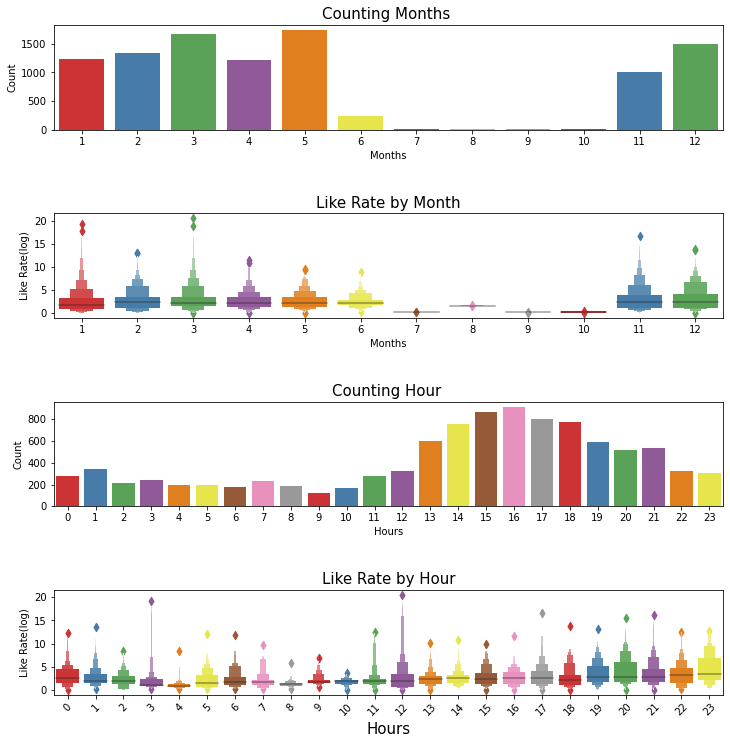

In [35]:
plt.figure(figsize = (12,12))

plt.subplot(411)
g = sns.countplot('publish_month', data=df_en, palette="Set1")
g.set_title("Counting Months ", fontsize=15)
g.set_xlabel("Months", fontsize=10)
g.set_ylabel("Count", fontsize=10)

plt.subplot(412)
g1 = sns.lvplot(x='publish_month', y='like_rate', data=df_en, palette="Set1")
g1.set_title("Like Rate by Month", fontsize=15)
g1.set_xlabel("Months", fontsize=10)
g1.set_ylabel("Like Rate(log)", fontsize=10)

plt.subplot(413)
g = sns.countplot('publish_hour', data=df_en, palette="Set1")
g.set_title("Counting Hour ", fontsize=15)
g.set_xlabel("Hours", fontsize=10)
g.set_ylabel("Count", fontsize=10)

plt.subplot(414)
g1 = sns.lvplot(x='publish_hour', y='like_rate', data=df_en, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=15)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=10)


plt.subplots_adjust(hspace = 0.8, top = 0.9)

plt.show()

## Music

In [26]:
df_mu.describe()

,category_id,views,likes,dislikes,comment_count,likes_log,views_log,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate,publish_hour,publish_month
count,6472.0,6.472000e+03,6.472000e+03,6472.000000,6.472000e+03,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000
mean,10.0,6.201003e+06,2.189182e+05,7907.757726,1.935976e+04,10.812821,14.121758,7.133924,8.181347,4.756527,0.125999,0.386095,12.023486,5.478677
std,0.0,1.545988e+07,4.847392e+05,23617.112304,6.832531e+04,2.066549,1.884491,2.065799,1.954700,3.384061,0.171082,0.386423,6.011970,3.828640
min,10.0,1.591000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,7.372746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.0,3.827148e+05,1.432250e+04,346.000000,9.930000e+02,9.569657,12.855048,5.849325,6.901737,2.483550,0.059430,0.151366,5.000000,3.000000
50%,10.0,1.434128e+06,6.228050e+04,1243.500000,3.906000e+03,11.039420,14.176068,7.126489,8.270525,3.940030,0.090916,0.272196,14.000000,4.000000
75%,10.0,4.947953e+06,1.954112e+05,4921.000000,1.398000e+04,12.182867,15.414485,8.501470,9.545454,5.917454,0.141669,0.467831,16.000000,11.000000
max,10.0,2.252119e+08,5.613827e+06,343541.000000,1.228655e+06,15.540743,19.232552,12.747065,14.021431,29.046646,4.918939,6.004010,23.000000,12.000000


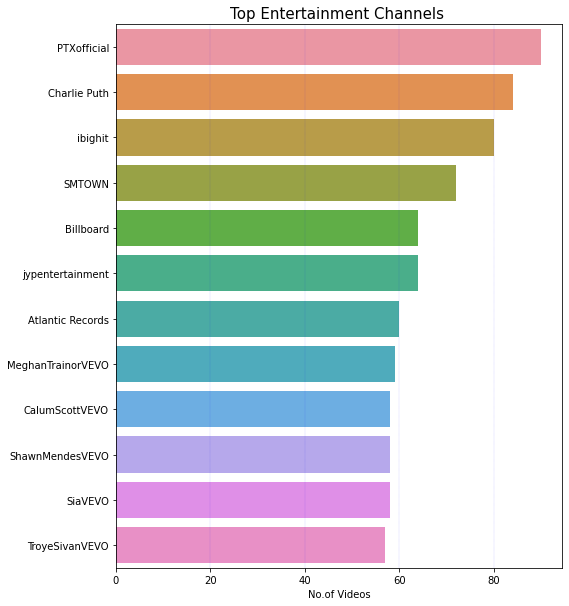

In [27]:
plt.figure(figsize = (8,10))

g=df_mu.groupby('channel_title').size().reset_index(name="video_count").nlargest(12,'video_count')
g = sns.barplot('video_count','channel_title',data=g)
g.set_title("Top Music Channels " , fontsize = 15)
g.set_xlabel("No.of Videos", fontsize = 10)
g.set_ylabel('', fontsize = 12)
plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='x')
plt.show()

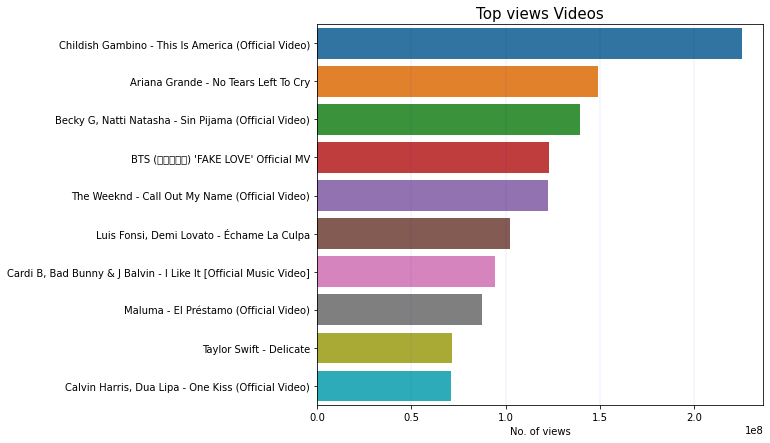

In [28]:
most(df_mu, 'views')


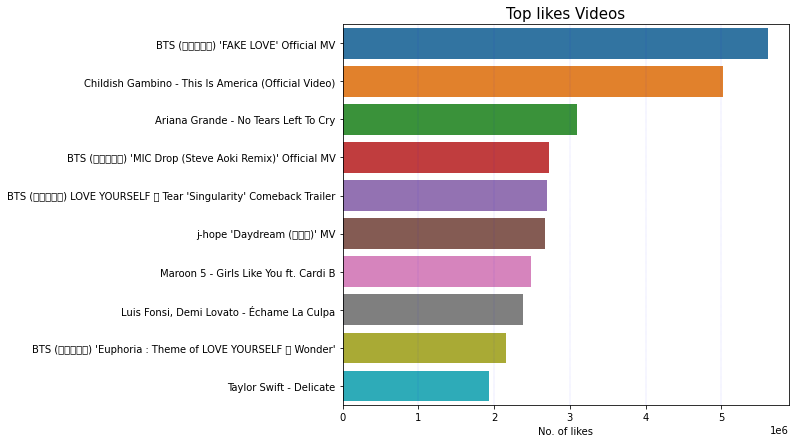

In [29]:
most(df_mu, 'likes')

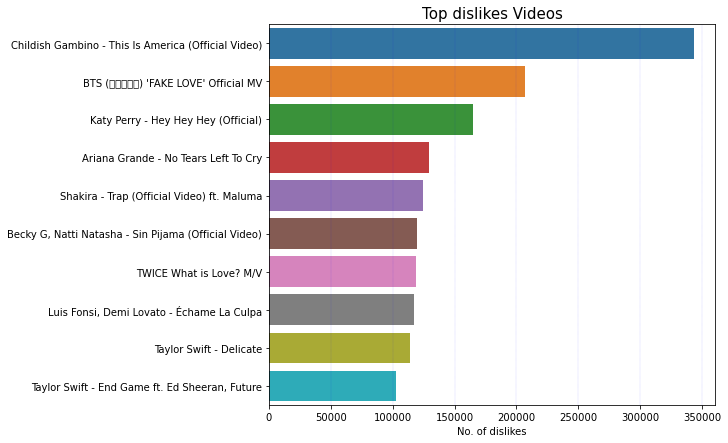

In [30]:
most(df_mu, 'dislikes')

#### Most common words in video titles

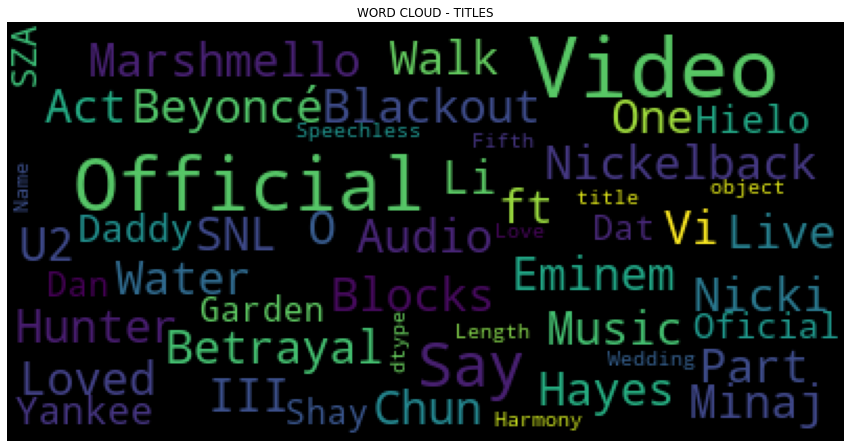

In [31]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_mu['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Quick Stats for Top 10 Music Videos

In [32]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_date', 'category_name']

most_frequent = df_mu.groupby(selected_columns)['video_id'].agg(
    [('code_count',len)]).sort_values(
    "code_count", ascending=False
).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:60px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0])  + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>{}</table>'.format(table_content))
)

Photo,Channel Name,Title,Category,Publish Date
,Charlie Puth,Charlie Puth - BOY [Official Audio],Music,2018-05-11
,SamSmithWorldVEVO,Sam Smith - Pray (Official Video) ft. Logic,Music,2018-05-09
,杰威爾音樂 JVR Music,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV",Music,2018-05-14
,johnmayerVEVO,John Mayer - New Light,Music,2018-05-10
,Kelly Clarkson,Kelly Clarkson - Meaning of Life [Official Video],Music,2018-05-13
,BackstreetBoysVEVO,Backstreet Boys - Don't Go Breaking My Heart (Official Video),Music,2018-05-17
,FifthHarmonyVEVO,Fifth Harmony - Don't Say You Love Me,Music,2018-05-18
,NickiMinajAtVEVO,Nicki Minaj - Chun-Li (Live on SNL / 2018),Music,2018-05-20
,ChildishGambinoVEVO,Childish Gambino - This Is America (Official Video),Music,2018-05-06
,SZAVEVO,SZA - Garden (Say It Like Dat) (Official Video),Music,2018-05-18


#### Let's extract the hour and month value of datetime

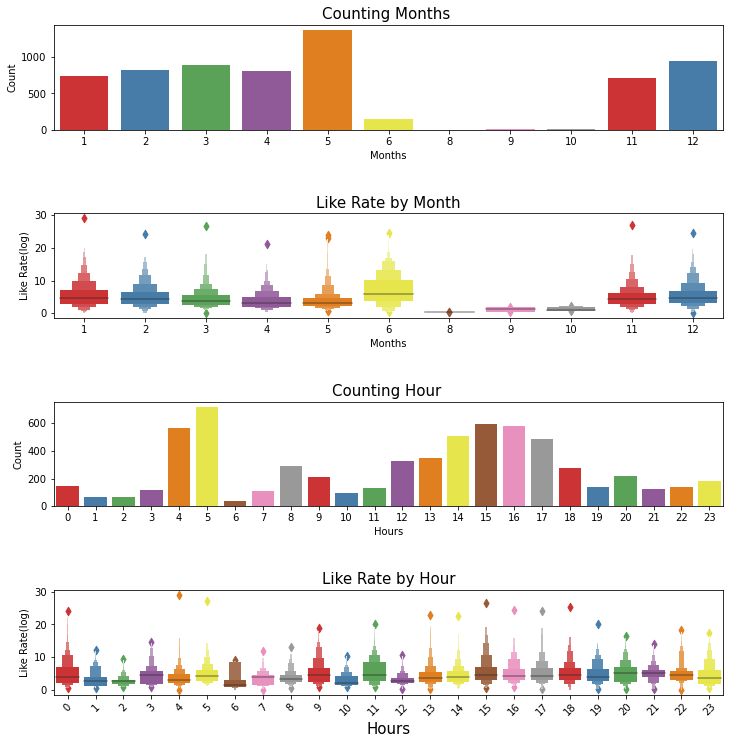

In [34]:
plt.figure(figsize = (12,12))

plt.subplot(411)
g = sns.countplot('publish_month', data=df_mu, palette="Set1")
g.set_title("Counting Months ", fontsize=15)
g.set_xlabel("Months", fontsize=10)
g.set_ylabel("Count", fontsize=10)

plt.subplot(412)
g1 = sns.lvplot(x='publish_month', y='like_rate', data=df_mu, palette="Set1")
g1.set_title("Like Rate by Month", fontsize=15)
g1.set_xlabel("Months", fontsize=10)
g1.set_ylabel("Like Rate(log)", fontsize=10)

plt.subplot(413)
g = sns.countplot('publish_hour', data=df_mu, palette="Set1")
g.set_title("Counting Hour ", fontsize=15)
g.set_xlabel("Hours", fontsize=10)
g.set_ylabel("Count", fontsize=10)

plt.subplot(414)
g1 = sns.lvplot(x='publish_hour', y='like_rate', data=df_mu, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=15)
g1.set_xlabel("Hours", fontsize=10)
g1.set_ylabel("Like Rate(log)", fontsize=10)


plt.subplots_adjust(hspace = 0.8, top = 0.9)

plt.show()